In [1]:
import numpy as np
from pymatbridge import Matlab
import HHTplots
import matplotlib.pyplot as plt
%matplotlib nbagg

In [2]:
mlab = Matlab()
mlab.start()
mlab.run_code('addpaths')

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-f1213943-3212-4fe6-a3d6-269f75773ffc
Send 'exit' command to kill the server
...........MATLAB started and connected!


{'content': {'datadir': '/tmp/MatlabData/', 'figures': [], 'stdout': ''},
 'result': [],
 'success': True}

## 1-D Example: 4-Hz Quasi-Periodic Oscillation X-ray Light Curve of XTE J1550-564

In [3]:
filename = './Input_data/example_qpo.txt'
Nstd = 6
NE = 100
seedNo = 50
numImf = 10
runCEEMD = 1
maxSift = 10
typeSpline = 2
toModifyBC = 1
randType = 2
checksignal = 1

In [4]:
data = np.loadtxt(filename)
time = data[:, 0]
amp = data[:, 1]
dt = time[1] - time[0]

In [5]:
res = mlab.run_func('feemd_post_pro', amp, Nstd, NE, numImf, runCEEMD, maxSift,
                    typeSpline, toModifyBC, randType, seedNo, checksignal)
imfs = res['result']

In [6]:
oi = mlab.run_func('ratio1', imfs)
oi_pair = mlab.run_func('ratioa', imfs)
print('Non-orthogonal leakage of components:')
print(oi['result'])
print('Non-orthogonal leakage for pair of adjoining components:')
print(oi_pair['result'])

Non-orthogonal leakage of components:
-0.0040557260674418975
Non-orthogonal leakage for pair of adjoining components:
[[  2.05342017e-02]
 [  4.40971908e-02]
 [  2.05398560e-02]
 [  3.35536690e-02]
 [  3.54604635e-02]
 [  2.98706384e-02]
 [  3.39574267e-02]
 [  3.39435414e-02]
 [  7.13460425e-05]]


In [7]:
fa_res = mlab.run_func('fa', imfs[:, 3], dt, 'hilbtm', 'pchip', 0, nargout=2)
fa = fa_res['result']
ifreq = np.transpose(fa[0])
iamp = np.transpose(fa[1])

<IPython.core.display.Javascript object>


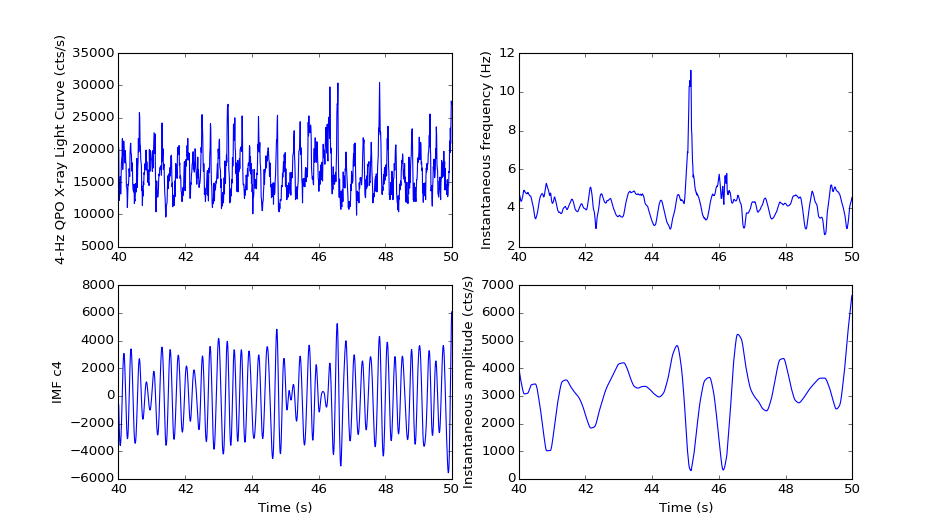

In [8]:
plt.figure()
HHTplots.example_qpo(time[4001:5000], amp[4001:5000], imfs[4001:5000, 3],
                      ifreq[4001:5000], iamp[4001:5000])

## 2-D Example: Lena Image

In [9]:
filename = './Input_data/example_lena.png'
npixs = 512
Nstd = 0.4
NE = 20
seedNo = 1
numImf = 6
runCEEMD = 1
maxSift = 10
typeSpline = 2
toModifyBC = 1
randType = 2
checksignal = 1

In [10]:
res = mlab.run_func('meemd', filename, npixs, Nstd, NE, numImf, runCEEMD,
                    maxSift, typeSpline, toModifyBC, randType, seedNo,
                    checksignal)
imfs = res['result']

<IPython.core.display.Javascript object>


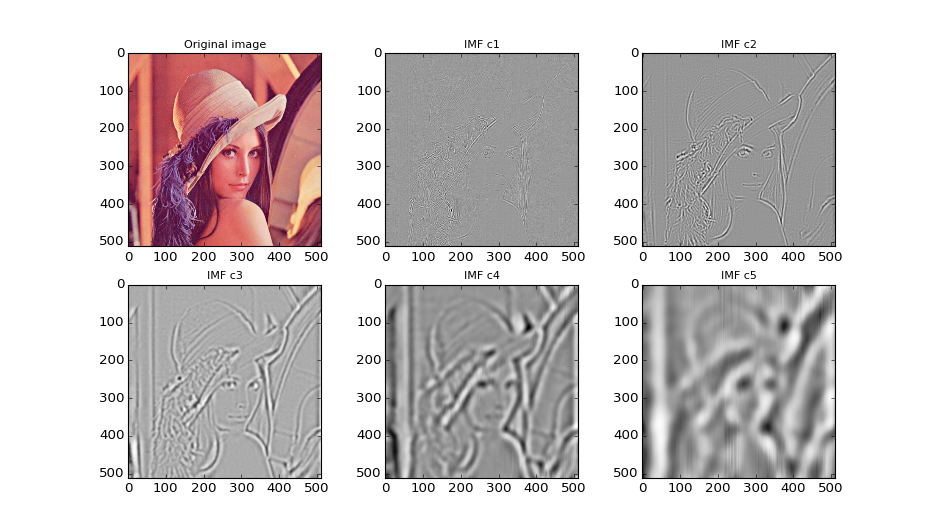

In [11]:
plt.figure()
HHTplots.example_lena(filename, imfs)

In [12]:
mlab.stop()

MATLAB closed


True